In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA CLEANING 

In [209]:
#IMPORT THE DATASET

data = pd.read_csv(r"C:\Users\anjal\Downloads\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding='unicode_escape')
#encoding='unicode_escape' -----------> used to handle the error
print(data)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [36]:
#Total rows and columns in the dataset
data.shape

(11251, 15)

In [37]:
#Check the datatype and non-null count of rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [210]:
#Delete the unnecessary columns
data.drop(['Status','unnamed1'],axis = 1,inplace = True)

#axis = 1 ---> columns ,  inplace = True ----> for permanent change

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [212]:
#Check the null values
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [213]:
#Drop the null value

data.dropna(inplace =True)

In [214]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [33]:
#method:2
#Instead of removing all the null values, we can calculate the average of the `amount` column and use that average to replace the null values.

avg_amount = data['Amount'].mean()
print(avg_amount)

#filling the null rows with the average amount 

fillna = data['Amount'].fillna(9453.6,inplace = True)
print(fillna)

data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

*You can choose between two methods: removing all the null rows or replacing the null rows with the average value.*
*This time, I'll go with the first method, as we only have 12 null rows.*

In [45]:
#Change the datatype of column

data['Amount'] = data['Amount'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [48]:
#Top 5 rows 
data.head(5)

#Bottom 5 rows
data.tail(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [49]:
#Columns name

data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [51]:
# Rename the column name 

data.rename(columns = {'Marital_Status':'Married_Status'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [52]:
# Describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [53]:
# Use describe() for specific columns

data[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


### EXPLORATORY DATA ANALYSIS.

C:\Users\anjal\AppData\Local\Temp\ipykernel_17464\4116552186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  total_count = sns.countplot(x='Gender', data=data, palette=color_palette)


Text(0.5, 1.0, 'Total number of gender')

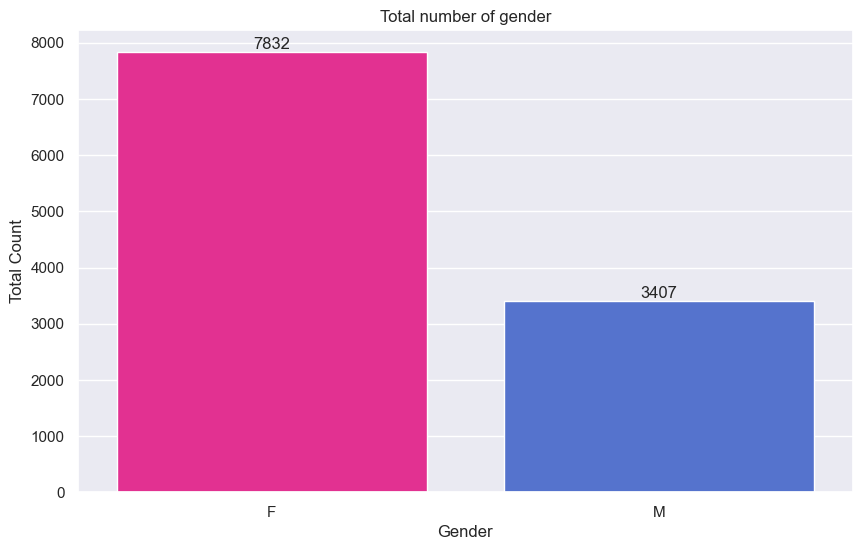

In [290]:
#Total count of individuals for each gender.

plt.figure(figsize = [10,6])

color_palette = {'M': 'royalblue', 'F': 'deeppink'}
total_count = sns.countplot(x='Gender', data=data, palette=color_palette)

for bars in total_count.containers:
    total_count.bar_label(bars)


[Text(0, 0, '74.3M'), Text(0, 0, '31.9M')]

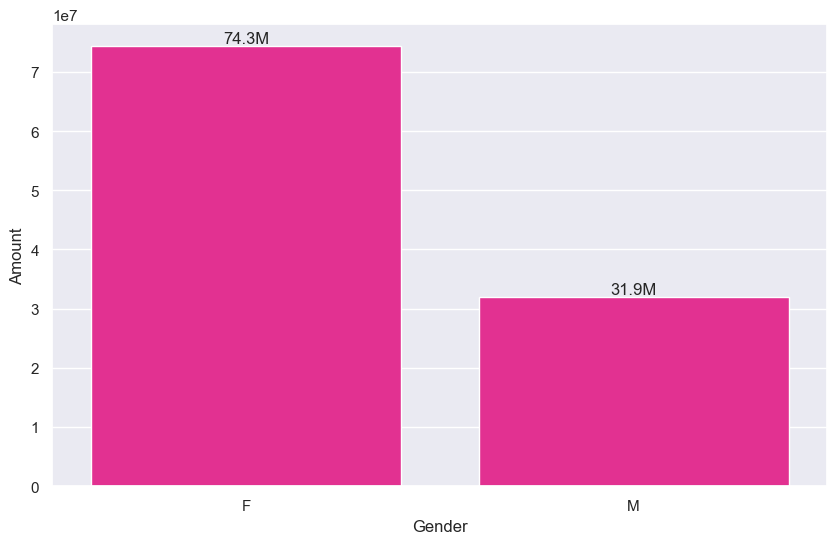

In [292]:
#Total amount distributed across different genders

plt.figure(figsize = [10,6])
group_by = data.groupby(['Gender'],as_index= False)['Amount'].sum().sort_values(by = 'Amount',ascending= False)
bars = sns.barplot(x = 'Gender',y='Amount',data = group_by,color = 'deeppink')

# Define a function to format the labels in millions
def format_millions(value):
    return f'{value / 1e6:.1f}M'
bars.bar_label(bars.containers[0], labels=[format_millions(value) for value in group_by['Amount']])


*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

In [ ]:
#Convert amount into million and thousand

1. def format_millions(value):
    return f'{value / 1e6:.1f}M'
1e6 --> used for million

2. def format_thousands(value):
    return f'{value / 1e3:.1f}K'
1e3 ---> used for thousand

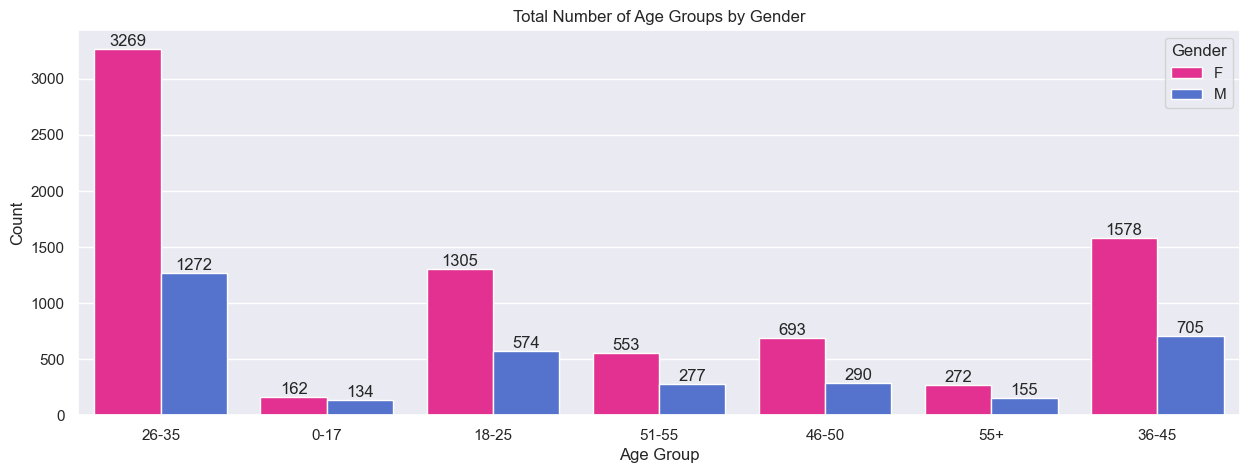

In [176]:
# Total count of individuals in each age group, categorized by gender

color_palette = {'M': 'royalblue', 'F': 'deeppink'}

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(x='Age Group', data=data, hue='Gender', palette=color_palette)

for bars in ax.containers:
    ax.bar_label(bars)


plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Total Number of Age Groups by Gender')

plt.show()

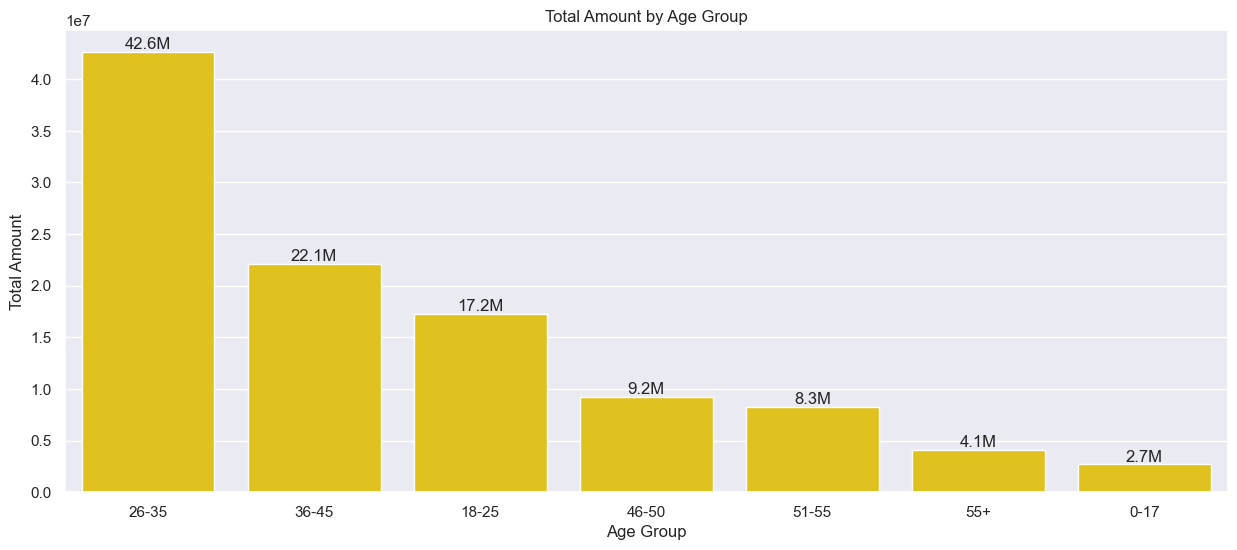

In [289]:
# Total amount distributed across different age groups

sns.set(rc={'figure.figsize':(15,6)})

group_by = data.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
ax = sns.barplot(x = 'Age Group',y = 'Amount' ,data = group_by,color = 'gold')

def format_million(value):
    return f'{value / 1e6:.1f}M'  
ax.bar_label(ax.containers[0], labels=[format_million(value) for value in group_by['Amount']])

plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount by Age Group')

plt.show()


*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

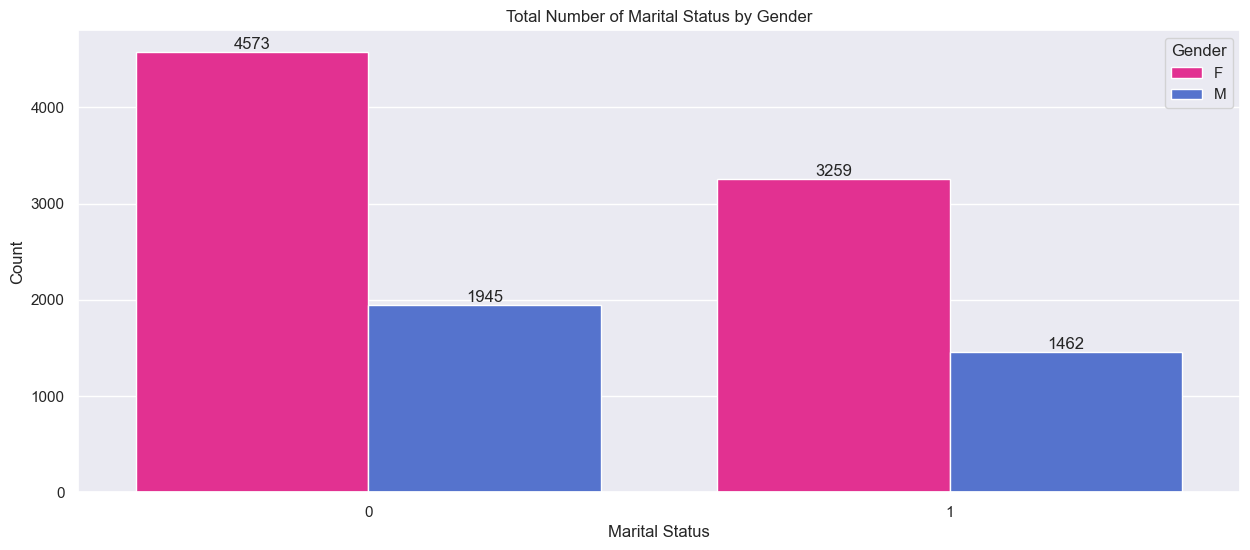

In [288]:
# Total count of individuals, categorized by their marital status, and broken down by gender

plt.figure(figsize=[15,6])

color_palette = {'M': 'royalblue', 'F': 'deeppink'}
sns.set(rc={'figure.figsize':(18,8)})
ax = sns.countplot(x='Marital_Status', data=data, hue='Gender', palette=color_palette)

for bars in ax.containers:
    ax.bar_label(bars)


plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Total Number of Marital Status by Gender')

plt.show()


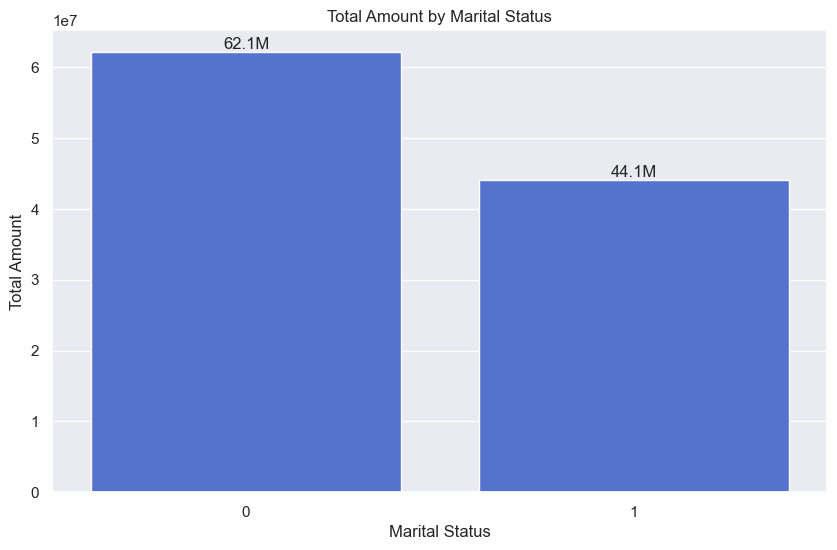

In [287]:
#Total amount distributed across different marital status categories.

plt.figure(figsize=[10,6])

group_by = data.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Marital_Status', y='Amount', data=group_by,color = 'royalblue')

def format_million(value):
    return f'{value / 1e6:.1f}M'
ax.bar_label(ax.containers[0], labels=[format_million(value) for value in group_by['Amount']])

plt.xlabel('Marital Status')
plt.ylabel('Total Amount')
plt.title('Total Amount by Marital Status')

plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

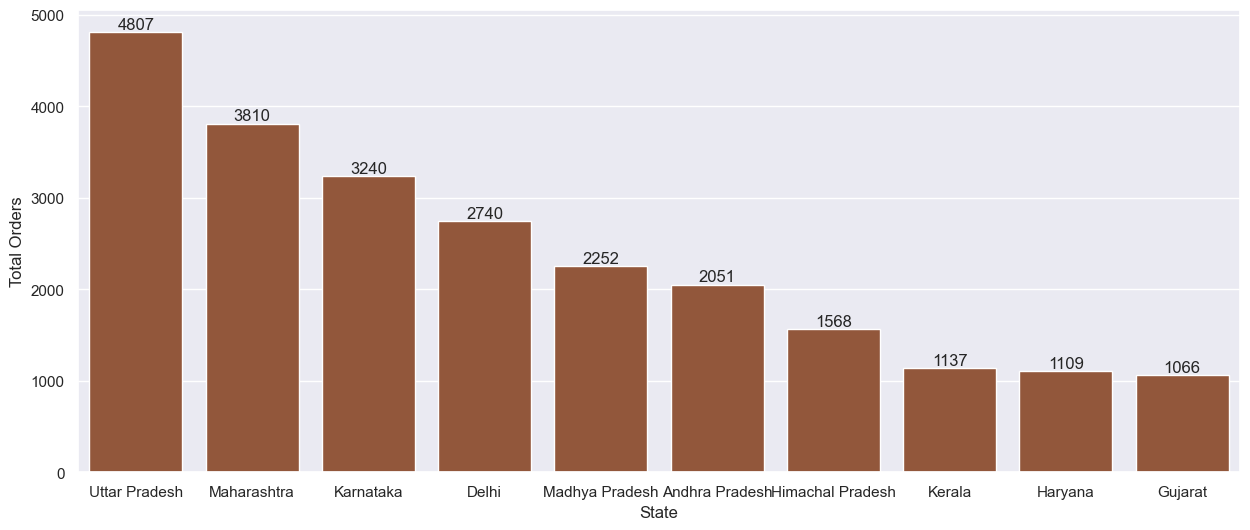

In [285]:
# Total count of orders from the top 10 states
plt.figure(figsize=[15,6])

group_by = data.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
ax = sns.barplot(x = 'State',y = 'Orders',data = group_by,color = 'sienna')

ax.bar_label(ax.containers[0])
plt.ylabel('Total Orders')
plt.show()

[Text(0, 0, '19.4M'),
 Text(0, 0, '14.4M'),
 Text(0, 0, '13.5M'),
 Text(0, 0, '11.6M'),
 Text(0, 0, '8.1M'),
 Text(0, 0, '8.0M'),
 Text(0, 0, '5.0M'),
 Text(0, 0, '4.2M'),
 Text(0, 0, '4.0M'),
 Text(0, 0, '3.9M')]

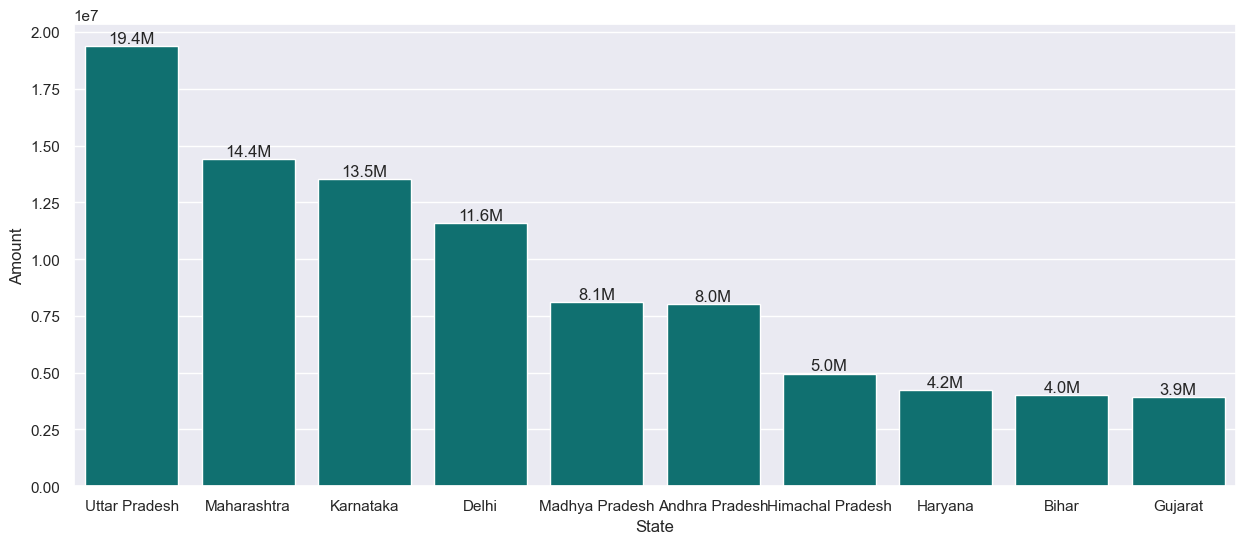

In [284]:
#Top 10 states by the total amount distributed across them
plt.figure(figsize=[15,6])
group_by = data.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
ax = sns.barplot(x = 'State',y = 'Amount',data = group_by,color = 'teal')

def format_million(value):
    return f'{value / 1e6:.1f}M'
ax.bar_label(ax.containers[0], labels=[format_million(value) for value in group_by['Amount']])

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

([<matplotlib.patches.Wedge at 0x1613ddca630>,
 [Text(-0.9480125983845925, -0.5579176581755533, 'Central'),
  Text(0.4279834253821782, -1.0133262986808038, 'Eastern'),
  Text(0.9142655275711009, -0.6116523073569956, 'Northern'),
  Text(0.9259714018087779, 0.5937819153799543, 'Southern'),
  Text(-0.35581237677255473, 1.040863849182719, 'Western')],
 [Text(-0.5170977809370504, -0.30431872264121085, '39.2%'),
  Text(0.23344550475391534, -0.5527234356440748, '6.6%'),
  Text(0.498690287766055, -0.33362853128563397, '11.9%'),
  Text(0.5050753100775152, 0.3238810447527023, '25.0%'),
  Text(-0.19407947823957528, 0.5677439177360284, '17.3%')])

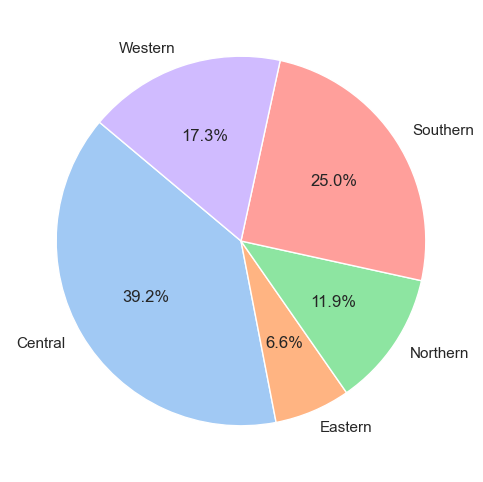

In [283]:
#Total amount percentage distributed across different zones

group_by_zone = data.groupby('Zone', as_index=False)['Amount'].sum()

plt.figure(figsize=[8, 6])
plt.pie(group_by_zone['Amount'], labels=group_by_zone['Zone'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))


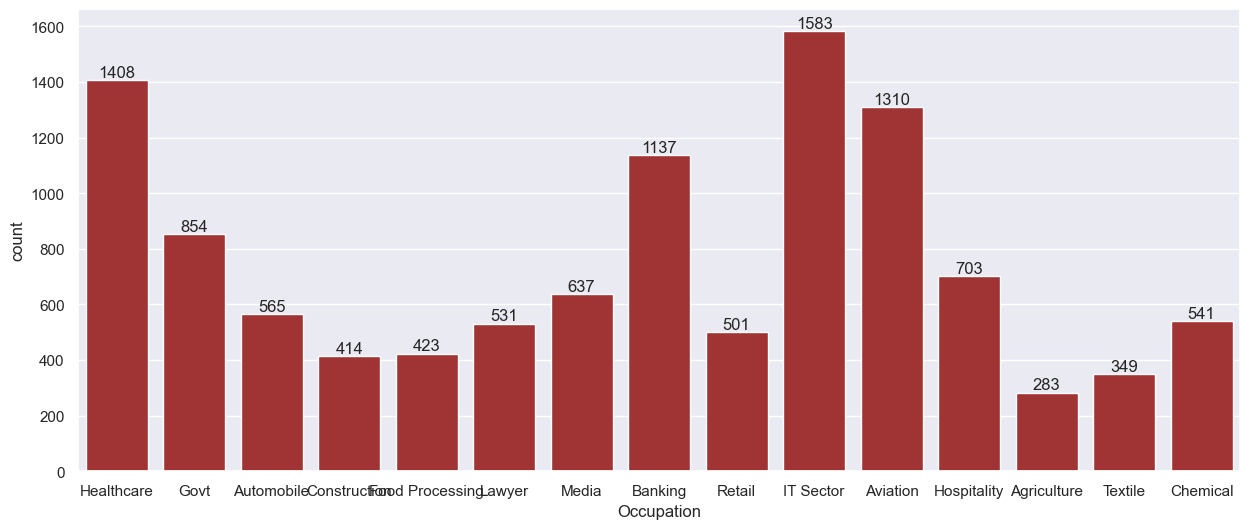

In [282]:
# Total count of individuals in each occupation.

plt.figure(figsize = [15,6])
ax = sns.countplot(data = data, x = 'Occupation',color = 'firebrick')
for bars in ax.containers:
    ax.bar_label(bars)

[Text(0, 0, '14.8M'),
 Text(0, 0, '13.0M'),
 Text(0, 0, '12.6M'),
 Text(0, 0, '10.8M'),
 Text(0, 0, '8.5M'),
 Text(0, 0, '6.4M'),
 Text(0, 0, '6.3M'),
 Text(0, 0, '5.4M'),
 Text(0, 0, '5.3M'),
 Text(0, 0, '5.0M')]

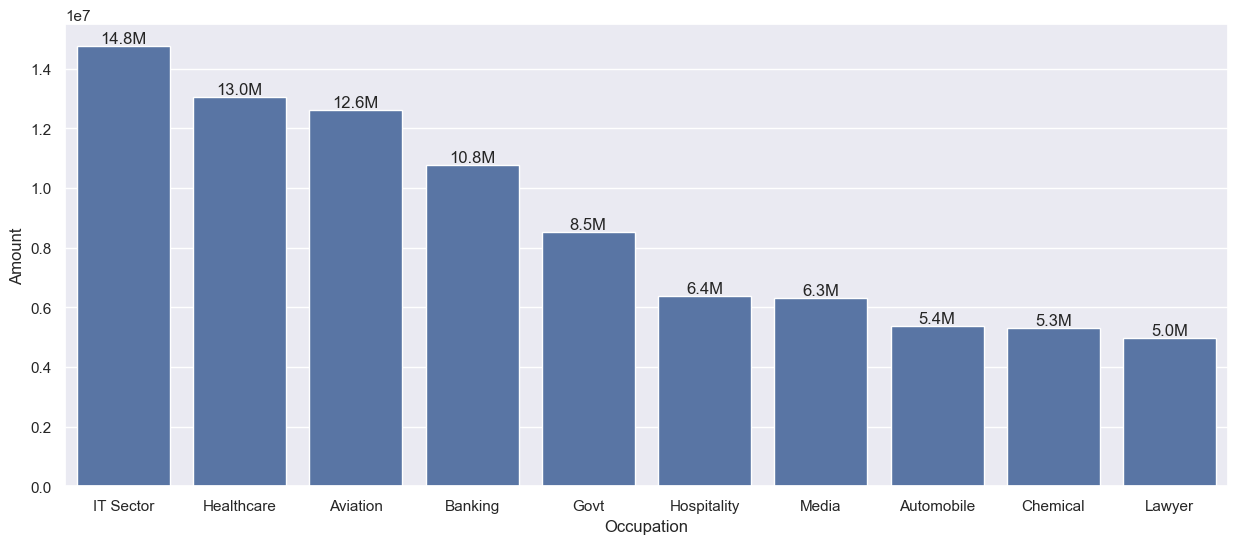

In [281]:
#Top 10 occupations by the total amount by individuals

plt.figure(figsize = [15,6])

group_by = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
ax = sns.barplot(x='Occupation', y='Amount', data=group_by)

def million_format(value):
    return f'{value / 1e6:.1f}M'
ax.bar_label(ax.containers[0], labels=[million_format(value) for value in group_by['Amount']])


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

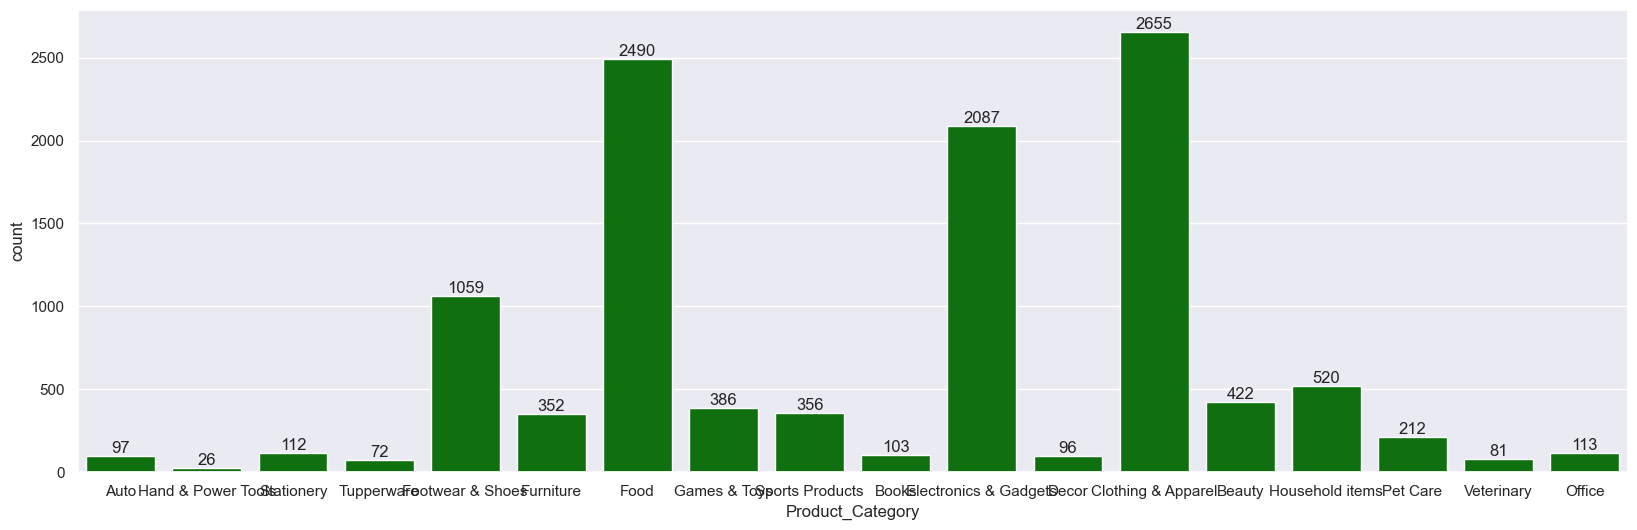

In [296]:
#Total count of individuals in each Product Category.

plt.figure(figsize = [20,6])
ax = sns.countplot(x='Product_Category',data=data,color = 'green')

for bars in ax.containers:
    ax.bar_label(bars)

[Text(0, 0, '33.9M'),
 Text(0, 0, '16.5M'),
 Text(0, 0, '15.6M'),
 Text(0, 0, '15.6M'),
 Text(0, 0, '5.4M'),
 Text(0, 0, '4.3M'),
 Text(0, 0, '3.6M'),
 Text(0, 0, '2.0M'),
 Text(0, 0, '2.0M'),
 Text(0, 0, '1.7M')]

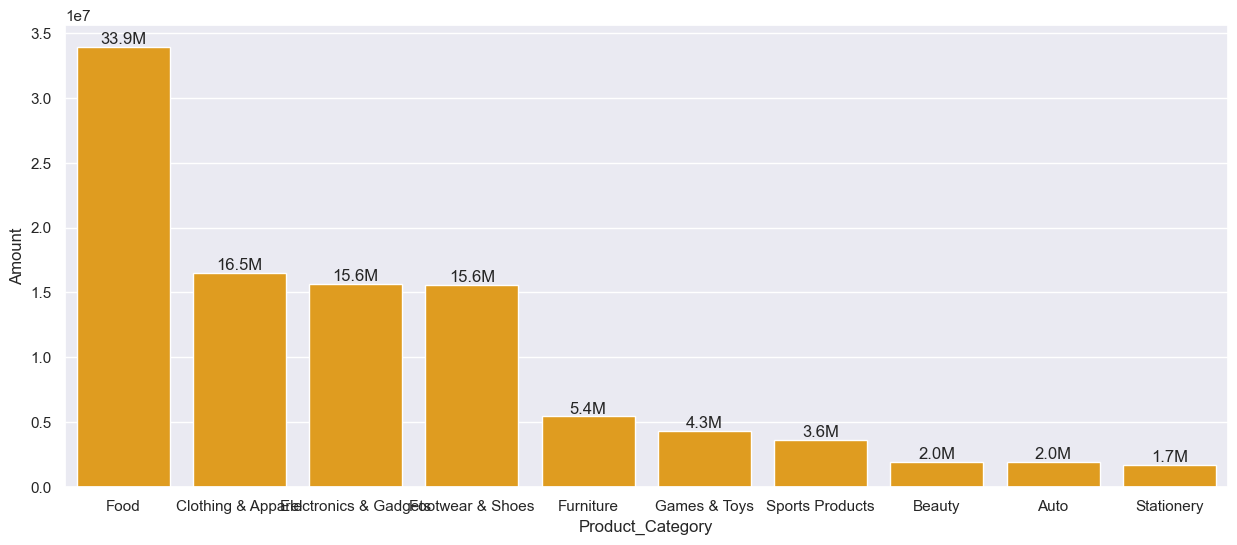

In [294]:
#Top 10 product categories by the total amount by individuals

plt.figure(figsize = [15,6])

group_by = data.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
ax = sns.barplot(x= 'Product_Category',y = 'Amount',data = group_by,color='orange')

def million_format(value):
    return f'{value / 1e6:.1f}M'
ax.bar_label(ax.containers[0],labels = [million_format(value) for value in group_by['Amount']])

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

[Text(0, 0, '127'),
 Text(0, 0, '116'),
 Text(0, 0, '91'),
 Text(0, 0, '82'),
 Text(0, 0, '79'),
 Text(0, 0, '79'),
 Text(0, 0, '76'),
 Text(0, 0, '76'),
 Text(0, 0, '75'),
 Text(0, 0, '74')]

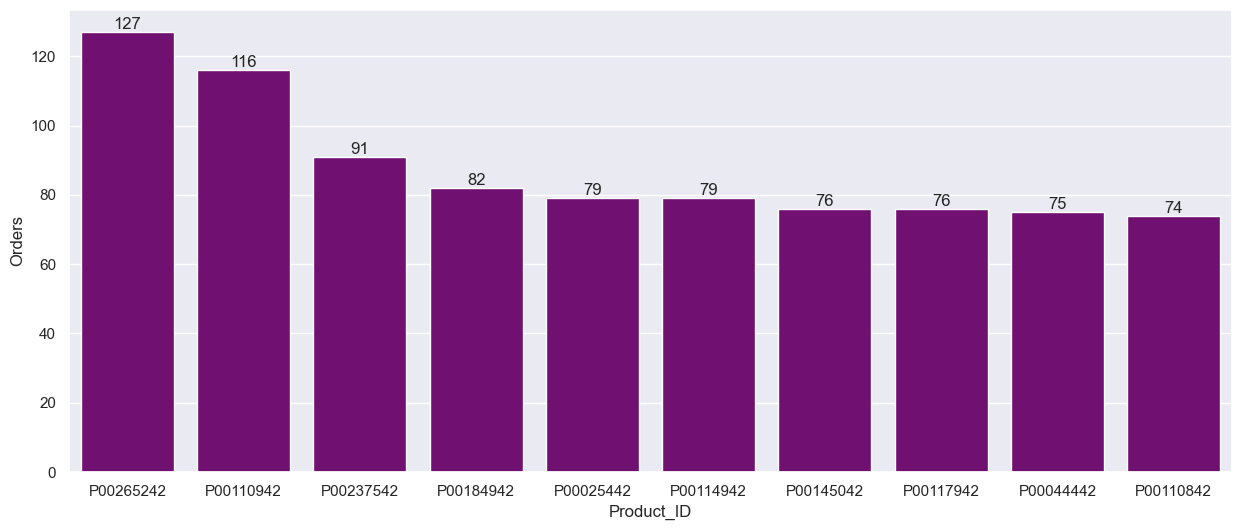

In [279]:
# Top 10 product categories by total orders from individuals
plt.figure(figsize=[15,6])

group_by = data.groupby(['Product_ID'],as_index= False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
ax = sns.barplot(x = 'Product_ID',y = 'Orders' , data= group_by,color='purple')

ax.bar_label(ax.containers[0])

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*